Chapter 1

Generation 1: Best Fitness = 15, Avg Fitness = 10.33
Generation 2: Best Fitness = 16, Avg Fitness = 10.68
Generation 3: Best Fitness = 16, Avg Fitness = 10.77
Generation 4: Best Fitness = 18, Avg Fitness = 11.28
Generation 5: Best Fitness = 17, Avg Fitness = 11.65
Generation 6: Best Fitness = 17, Avg Fitness = 12.23
Generation 7: Best Fitness = 18, Avg Fitness = 12.50
Generation 8: Best Fitness = 18, Avg Fitness = 12.84
Generation 9: Best Fitness = 18, Avg Fitness = 12.85
Generation 10: Best Fitness = 17, Avg Fitness = 12.96
Generation 11: Best Fitness = 18, Avg Fitness = 13.32
Generation 12: Best Fitness = 18, Avg Fitness = 13.68
Generation 13: Best Fitness = 18, Avg Fitness = 14.15
Generation 14: Best Fitness = 18, Avg Fitness = 13.96
Generation 15: Best Fitness = 17, Avg Fitness = 13.95
Generation 16: Best Fitness = 19, Avg Fitness = 14.09
Generation 17: Best Fitness = 17, Avg Fitness = 14.34
Generation 18: Best Fitness = 18, Avg Fitness = 13.99
Generation 19: Best Fitness = 18, Avg

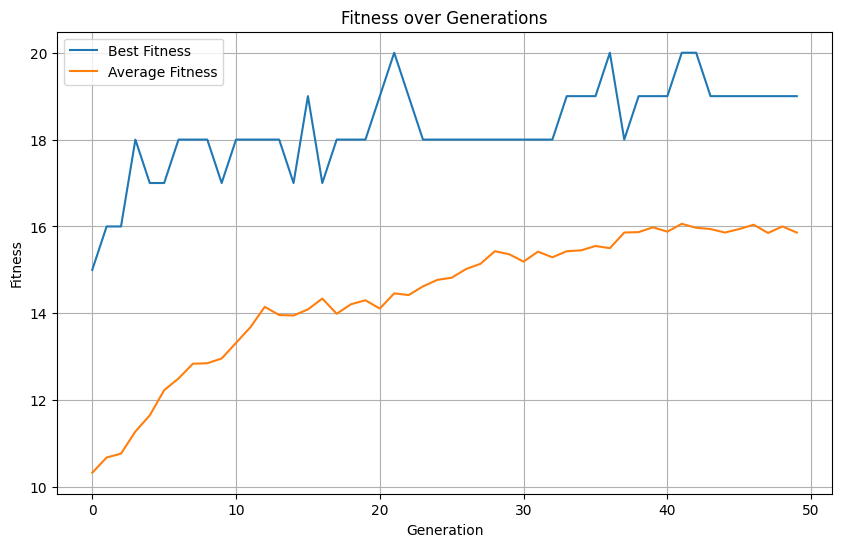

In [ ]:
import torch
import matplotlib.pyplot as plt

# Genetic Algorithm parameters
population_size = 100      # Number of individuals in the population
chromosome_length = 20     # Length of each binary string (chromosome)
mutation_rate = 0.01       # Probability of flipping each bit during mutation
crossover_rate = 0.7       # Probability of performing crossover between pairs
num_generations = 50       # Number of generations to evolve

# Initialize the population randomly with 0s and 1s
population = torch.randint(0, 2, (population_size, chromosome_length))

def fitness_function(population):
    """
    Fitness is the sum of bits in the chromosome.
    For the OneMax problem, the goal is to maximize this sum.
    """
    fitness = population.sum(dim=1)
    return fitness

def selection(population, fitness):
    """
    Roulette Wheel Selection:
    Select individuals probabilistically based on their fitness.
    """
    # Normalize fitness to probabilities
    selection_probs = fitness.float() / fitness.sum()
    # Select indices of individuals to form the mating pool
    selected_indices = torch.multinomial(selection_probs, population_size, replacement=True)
    # Create the selected population
    selected_population = population[selected_indices]
    return selected_population

def crossover(population, crossover_rate):
    """
    Single-point crossover between pairs of individuals.
    """
    new_population = population.clone()
    for i in range(0, population_size - 1, 2):
        if torch.rand(1).item() < crossover_rate:
            # Select a crossover point
            crossover_point = torch.randint(1, chromosome_length, (1,)).item()
            # Perform crossover between pairs
            new_population[i, crossover_point:], new_population[i+1, crossover_point:] = \
            population[i+1, crossover_point:], population[i, crossover_point:]
    return new_population

def mutation(population, mutation_rate):
    """
    Bit-flip mutation applied to the population.
    """
    mutation_mask = torch.rand(population.size()) < mutation_rate
    population[mutation_mask] = 1 - population[mutation_mask]
    return population

# Lists to record fitness over generations
best_fitness_over_time = []
avg_fitness_over_time = []

# Main Genetic Algorithm loop
for generation in range(num_generations):
    # Evaluate fitness
    fitness = fitness_function(population)
    # Record best and average fitness
    best_fitness = fitness.max().item()
    avg_fitness = fitness.float().mean().item()
    best_fitness_over_time.append(best_fitness)
    avg_fitness_over_time.append(avg_fitness)
    # Selection
    selected_population = selection(population, fitness)
    # Crossover
    crossed_population = crossover(selected_population, crossover_rate)
    # Mutation
    mutated_population = mutation(crossed_population, mutation_rate)
    # Update population
    population = mutated_population
    # Print progress
    print(f'Generation {generation+1}: Best Fitness = {best_fitness}, Avg Fitness = {avg_fitness:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(best_fitness_over_time, label='Best Fitness')
plt.plot(avg_fitness_over_time, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import torch
import random

# Core Components Definitions:
# Population: A set of random solutions (genotypes).
population_size = 10
genotype_length = 5
population = [torch.randn(genotype_length) for _ in range(population_size)]  # Populations

# Fitness Function
def fitness(solution):
    return -torch.sum(solution ** 2)  # Minimize the sum of squares for simplicity

# GA Parameters
num_generations = 20
mutation_rate = 0.1

for generation in range(num_generations):  # Generations
    # Calculate fitness of each solution
    fitness_values = [fitness(ind) for ind in population]

    # Selection: Select parents based on fitness
    sorted_population = [x for _, x in sorted(zip(fitness_values, population), key=lambda pair: pair[0], reverse=True)]
    parents = sorted_population[:2]  # Select the two best individuals

    # Crossover: Create new offspring by combining parents
    offspring = []
    for _ in range(population_size // 2):
        parent1, parent2 = random.sample(parents, 2)
        crossover_point = random.randint(1, genotype_length - 1)
        child1 = torch.cat((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = torch.cat((parent2[:crossover_point], parent1[crossover_point:]))
        offspring.extend([child1, child2])

    # Mutation: Randomly alter some offspring genes
    for child in offspring:
        if random.random() < mutation_rate:
            mutation_index = random.randint(0, genotype_length - 1)
            child[mutation_index] += torch.randn(1).item()  # Mutation

    # Create the new population
    population = parents + offspring[:population_size - len(parents)]

# Final solution
best_solution = sorted(population, key=lambda x: fitness(x), reverse=True)[0]
print("Best solution:", best_solution)


Best solution: tensor([-0.1051, -0.3039,  0.0575, -0.1835,  0.4139])


In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the target function (same function used to create the solution space)
def target_function(x):
    return np.sin(5 * np.pi * x) * np.cos(5 * np.pi * x)

# Create synthetic training data
x_train = torch.tensor(np.linspace(0, 1.5, 100).reshape(-1, 1), dtype=torch.float32)
y_train = torch.tensor(target_function(x_train).reshape(-1, 1), dtype=torch.float32)

# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss function, and optimizer
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Predict and find extrema using the trained model
x_test = torch.tensor(np.linspace(0, 1.5, 100).reshape(-1, 1), dtype=torch.float32)
y_pred = model(x_test).detach().numpy()

# Identify local minima and maxima
local_max = []
local_min = []
for i in range(1, len(y_pred) - 1):
    if y_pred[i] > y_pred[i - 1] and y_pred[i] > y_pred[i + 1]:
        local_max.append((x_test[i].item(), y_pred[i].item()))
    elif y_pred[i] < y_pred[i - 1] and y_pred[i] < y_pred[i + 1]:
        local_min.append((x_test[i].item(), y_pred[i].item()))

print("Local Maxima (Deep Learning):", local_max)
print("Local Minima (Deep Learning):", local_min)

<ipython-input-4-b712b7863348>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(target_function(x_train).reshape(-1, 1), dtype=torch.float32)


Local Maxima (Deep Learning): [(0.43939393758773804, 0.05530213564634323)]
Local Minima (Deep Learning): [(0.3636363744735718, -0.1417413353919983), (1.1515151262283325, -0.0616307333111763)]


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Global Maximum (GA): x = 0.3496107067088243, y = -0.49996260718337937


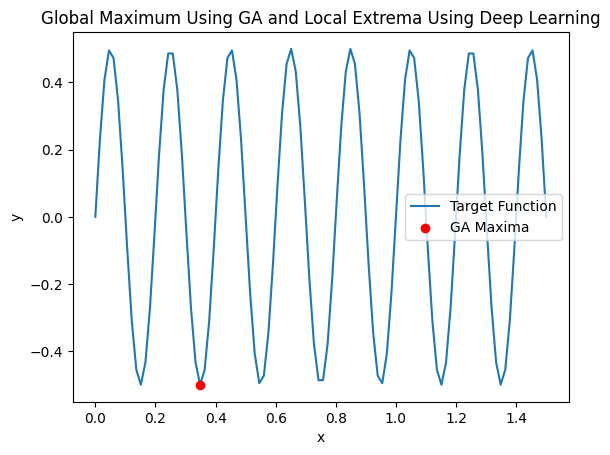

In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Define the target function (same function used to create the solution space)
def target_function(x):
    return np.sin(5 * np.pi * x) * np.cos(5 * np.pi * x)

# Update the fitness function to accept three parameters
def fitness_func(ga_instance, solution, solution_idx):
    x = solution[0]
    return -target_function(x)  # Minimize the negative to maximize the original function

# Define the parameters for PyGAD
ga_instance = pygad.GA(
    num_generations=100,
    num_parents_mating=5,
    fitness_func=fitness_func,
    sol_per_pop=10,
    num_genes=1,
    gene_space={'low': 0, 'high': 1.5},  # Search space between 0 and 1.5
    parent_selection_type="sss",
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=10,
    allow_duplicate_genes=True,
)

# Run the GA
ga_instance.run()

# Get the best solution (maxima)
solution, solution_fitness, _ = ga_instance.best_solution()
print(f"Global Maximum (GA): x = {solution[0]}, y = {target_function(solution[0])}")

# Plotting the results
x = np.linspace(0, 1.5, 100)
y = target_function(x)

plt.plot(x, y, label="Target Function")
plt.scatter([solution[0]], [target_function(solution[0])], color='red', label='GA Maxima', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Global Maximum Using GA and Local Extrema Using Deep Learning")
plt.show()


Chapter 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Core Components Definitions:
# Model (Genotype): A neural network representing a candidate solution
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

# Create model (Phenotype: The expression of the solution)
model = SimpleModel()

# Define loss function (Fitness function)
criterion = nn.MSELoss()  # Fitness
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training data
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Training loop (Generations: Each epoch updates the model)
num_epochs = 100
for epoch in range(num_epochs):  # Generations
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)  # Calculate fitness (loss)

    # Backward pass and optimization (Selection, Crossover, Mutation)
    optimizer.zero_grad()
    loss.backward()  # Compute gradients for parameter updates (like mutation)
    optimizer.step()  # Update weights (adaptation)

    # Print loss every 20 epochs (Termination is defined after `num_epochs`)
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Final model (best solution)
print("Trained Model Weight:", model.fc.weight.data)


Epoch [20/100], Loss: 0.1040
Epoch [40/100], Loss: 0.0337
Epoch [60/100], Loss: 0.0298
Epoch [80/100], Loss: 0.0264
Epoch [100/100], Loss: 0.0235
Trained Model Weight: tensor([[1.8729]])


Chapter 2 Fundamentals of Genetic Algorithms

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


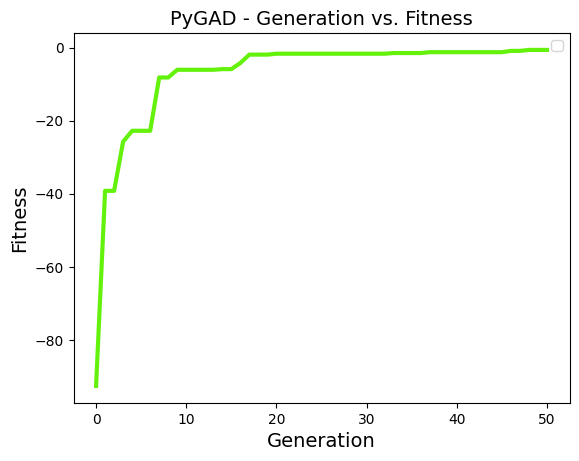

Best Solution: [ 0.61035681 -0.35299535 -0.21309226 -0.26779176 -0.12316718]
Fitness of the Best Solution: -0.6294320429237426


In [ ]:
import pygad
import numpy as np

# Define the fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Objective is to minimize the sum of squares
    return -np.sum(np.square(solution))

# Parameters for the genetic algorithm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 10
num_genes = 5
gene_space = {'low': -10, 'high': 10}

# Create an instance of the PyGAD class
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",  # Stochastic Universal Sampling
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)

# Run the genetic algorithm
ga_instance.run()

# Plot the result
ga_instance.plot_fitness()

# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution:", solution)
print("Fitness of the Best Solution:", solution_fitness)


In [ ]:
!pip show pygad

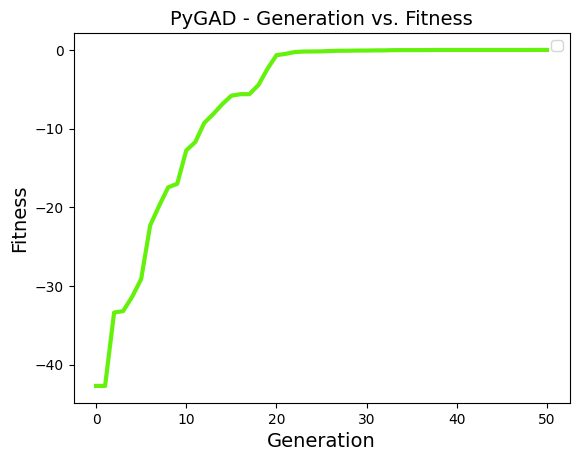

Best Solution with Latin Hypercube Sampling: [-0.00734819 -0.01104071  0.01835571 -0.03613743  0.06688635]
Fitness of the Best Solution with Latin Hypercube Sampling: -0.0062925227689966095


In [ ]:
import pygad
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt

# Define the fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Objective is to minimize the sum of squares
    return -np.sum(np.square(solution))

# Parameters for the genetic algorithm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 10
num_genes = 5
gene_space = {'low': -10, 'high': 10}

# Use Latin Hypercube Sampling to generate the initial population
lhs_sampler = qmc.LatinHypercube(d=num_genes)
initial_population = lhs_sampler.random(sol_per_pop)
initial_population = qmc.scale(initial_population, gene_space['low'], gene_space['high'])

# Create an instance of the PyGAD class using the initial population
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    initial_population=initial_population,  # Use the LHS-generated initial population
    parent_selection_type="sss",  # Stochastic Universal Sampling
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)

# Run the genetic algorithm
ga_instance.run()

# Plot the fitness evolution
ga_instance.plot_fitness()

# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution with Latin Hypercube Sampling:", solution)
print("Fitness of the Best Solution with Latin Hypercube Sampling:", solution_fitness)


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


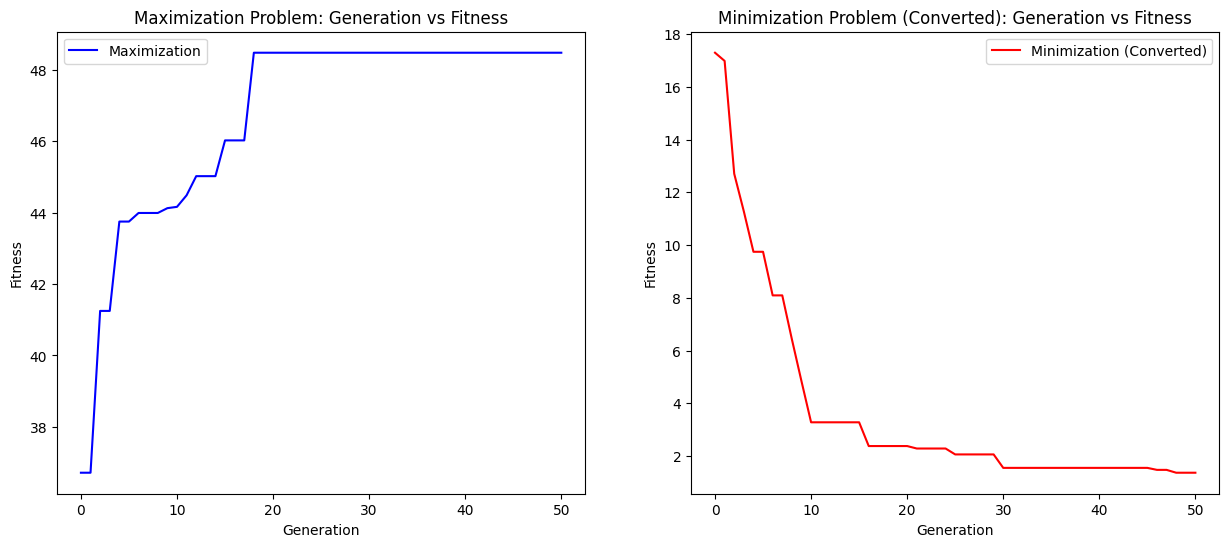

Best Solution (Maximization): [9.34030385 9.74208153 9.97411047 9.45732248 9.96655698]
Fitness of Best Solution (Maximization): 48.48037530387502
Best Solution (Minimization): [0.50239853 0.12086237 0.29883104 0.01256197 0.43276639]
Fitness of Best Solution (Minimization, converted to positive): 1.367420306978837


In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function (sum of the elements)
def objective_function(solution):
    return np.sum(solution)

# Define the fitness function for the maximization problem
def fitness_function_max(ga_instance, solution, solution_idx):
    return objective_function(solution)

# Define the fitness function for the minimization problem (converted)
def fitness_function_min(ga_instance, solution, solution_idx):
    return -objective_function(solution)

# Parameters for the genetic algorithm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 10
num_genes = 5
gene_space = {'low': 0, 'high': 10}

# Run the GA for maximization problem
ga_max = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function_max,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)
ga_max.run()

# Run the GA for minimization problem
ga_min = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function_min,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)
ga_min.run()

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Plot for Maximization
axes[0].plot(ga_max.best_solutions_fitness, color='blue', label="Maximization")
axes[0].set_title("Maximization Problem: Generation vs Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend()

# Plot for Minimization
axes[1].plot([-fitness for fitness in ga_min.best_solutions_fitness], color='red', label="Minimization (Converted)")
axes[1].set_title("Minimization Problem (Converted): Generation vs Fitness")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Fitness")
axes[1].legend()

plt.show()

# Get the best solutions for each problem
solution_max, fitness_max, _ = ga_max.best_solution()
solution_min, fitness_min, _ = ga_min.best_solution()

print("Best Solution (Maximization):", solution_max)
print("Fitness of Best Solution (Maximization):", fitness_max)

print("Best Solution (Minimization):", solution_min)
print("Fitness of Best Solution (Minimization, converted to positive):", -fitness_min)


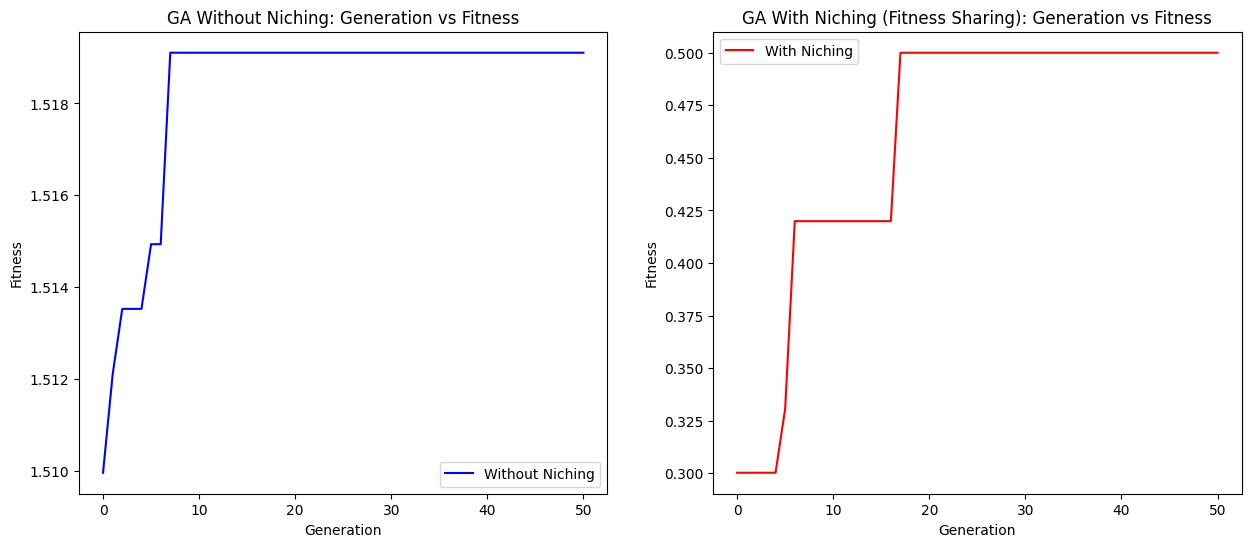

Best Solution Without Niching: [-0.01183281]
Fitness of Best Solution Without Niching: 1.5191056230824318
Best Solution With Niching: [3.0118968]
Fitness of Best Solution With Niching: 0.500015406695496


In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Define the multimodal fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Multimodal function with three peaks
    return (
        np.exp(-(solution[0] + 2) ** 2) +  # Peak 1
        1.5 * np.exp(-solution[0] ** 2) +  # Peak 2
        np.exp(-(solution[0] - 3) ** 2)    # Peak 3
    )

# Define a modified fitness function for niching (fitness sharing)
def fitness_function_with_niching(ga_instance, solution, solution_idx):
    # Calculate base fitness
    base_fitness = fitness_function(ga_instance, solution, solution_idx)

    # Apply fitness sharing to maintain diversity
    sharing_radius = 1.5  # Radius within which fitness sharing is applied
    niche_count = 0

    # Loop over the entire population to compute niche count
    for other_solution in ga_instance.population:
        distance = np.linalg.norm(solution - other_solution)
        if distance < sharing_radius:
            niche_count += 1

    # Apply fitness sharing by dividing the base fitness by the niche count
    if niche_count > 0:
        shared_fitness = base_fitness / niche_count
    else:
        shared_fitness = base_fitness

    return shared_fitness

# Parameters for the genetic algorithm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 20
num_genes = 1
gene_space = {'low': -5, 'high': 5}

# Run the GA without niching
ga_without_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)
ga_without_niching.run()

# Run the GA with niching (fitness sharing)
ga_with_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function_with_niching,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=2,
    crossover_type="single_point",
    mutation_type="random",
    mutation_percent_genes=20
)
ga_with_niching.run()

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for GA without niching
axes[0].plot(ga_without_niching.best_solutions_fitness, color='blue', label="Without Niching")
axes[0].set_title("GA Without Niching: Generation vs Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend()

# Plot for GA with niching
axes[1].plot(ga_with_niching.best_solutions_fitness, color='red', label="With Niching")
axes[1].set_title("GA With Niching (Fitness Sharing): Generation vs Fitness")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Fitness")
axes[1].legend()

plt.show()

# Get the best solutions for each problem
solution_without_niching, fitness_without_niching, _ = ga_without_niching.best_solution()
solution_with_niching, fitness_with_niching, _ = ga_with_niching.best_solution()

print("Best Solution Without Niching:", solution_without_niching)
print("Fitness of Best Solution Without Niching:", fitness_without_niching)

print("Best Solution With Niching:", solution_with_niching)
print("Fitness of Best Solution With Niching:", fitness_with_niching)


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


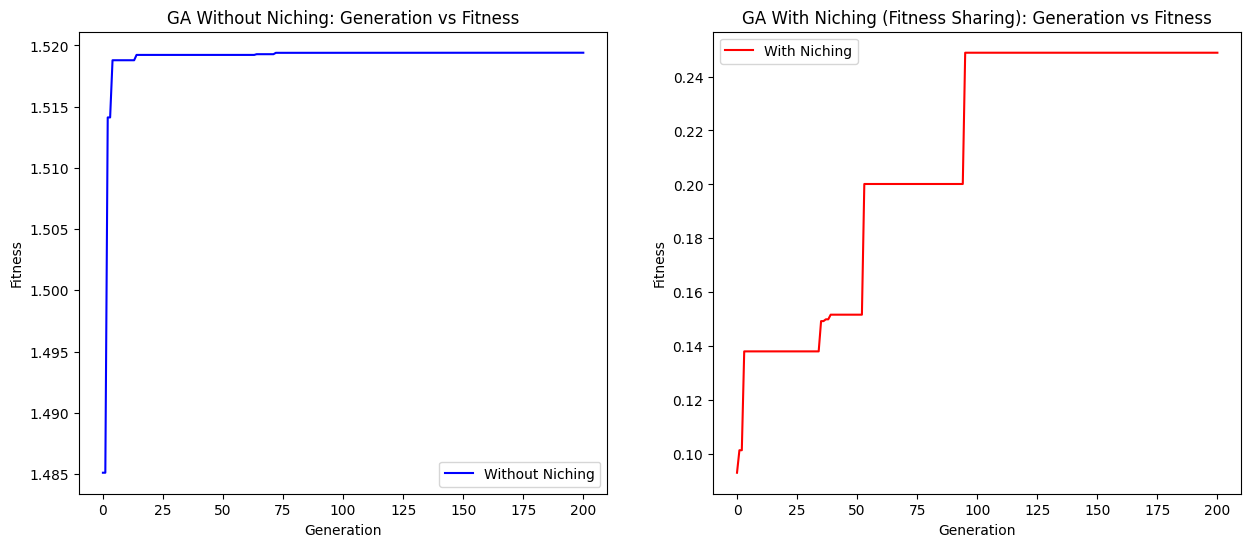

Best Solution Without Niching: [-0.02709492]
Fitness of Best Solution Without Niching: 1.5194012831466461
Best Solution With Niching: [0.11210447]
Fitness of Best Solution With Niching: 0.24884276735741692


In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Define the multimodal fitness function
def fitness_function(ga_instance, solution, solution_idx):
    return (
        np.exp(-(solution[0] + 2) ** 2) +  # Peak 1
        1.5 * np.exp(-solution[0] ** 2) +  # Peak 2
        np.exp(-(solution[0] - 3) ** 2)    # Peak 3
    )

# Define a modified fitness function for niching (fitness sharing)
def fitness_function_with_niching(ga_instance, solution, solution_idx):
    base_fitness = fitness_function(ga_instance, solution, solution_idx)
    sharing_radius = 1.5
    niche_count = 0

    for other_solution in ga_instance.population:
        distance = np.linalg.norm(solution - other_solution)
        if distance < sharing_radius:
            niche_count += 1

    shared_fitness = base_fitness / niche_count if niche_count > 0 else base_fitness
    return shared_fitness

# Parameters for the genetic algorithm
num_generations = 200  # Increased number of generations for smoother convergence
num_parents_mating = 10  # Increased number of parents to ensure more diversity
sol_per_pop = 50  # Increased population size to provide better exploration
num_genes = 1
gene_space = {'low': -5, 'high': 5}
mutation_percent_genes = 10  # Reduced mutation rate for smoother convergence

# Run the GA without niching
ga_without_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=5,  # Keeping more parents for stability
    crossover_type="uniform",  # Using uniform crossover for better gene recombination
    mutation_type="random",
    mutation_percent_genes=mutation_percent_genes
)
ga_without_niching.run()

# Run the GA with niching (fitness sharing)
ga_with_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function_with_niching,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="sss",
    keep_parents=5,
    crossover_type="uniform",
    mutation_type="random",
    mutation_percent_genes=mutation_percent_genes
)
ga_with_niching.run()

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for GA without niching
axes[0].plot(ga_without_niching.best_solutions_fitness, color='blue', label="Without Niching")
axes[0].set_title("GA Without Niching: Generation vs Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend()

# Plot for GA with niching
axes[1].plot(ga_with_niching.best_solutions_fitness, color='red', label="With Niching")
axes[1].set_title("GA With Niching (Fitness Sharing): Generation vs Fitness")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Fitness")
axes[1].legend()

plt.show()

# Get the best solutions for each problem
solution_without_niching, fitness_without_niching, _ = ga_without_niching.best_solution()
solution_with_niching, fitness_with_niching, _ = ga_with_niching.best_solution()

print("Best Solution Without Niching:", solution_without_niching)
print("Fitness of Best Solution Without Niching:", fitness_without_niching)

print("Best Solution With Niching:", solution_with_niching)
print("Fitness of Best Solution With Niching:", fitness_with_niching)


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause t

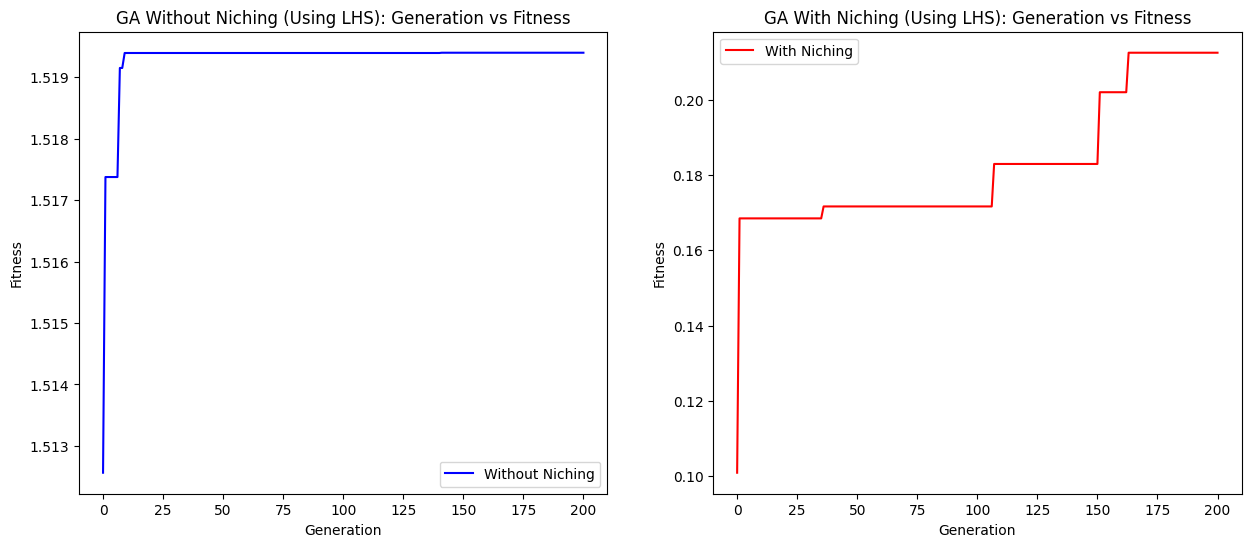

Best Solution Without Niching: [-0.02521738]
Fitness of Best Solution Without Niching: 1.5193990833638726
Best Solution With Niching: [0.12485684]
Fitness of Best Solution With Niching: 0.2125711285748857


In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

# Define the multimodal fitness function
def fitness_function(ga_instance, solution, solution_idx):
    return (
        np.exp(-(solution[0] + 2) ** 2) +  # Peak 1
        1.5 * np.exp(-solution[0] ** 2) +  # Peak 2
        np.exp(-(solution[0] - 3) ** 2)    # Peak 3
    )

# Define a modified fitness function for niching (fitness sharing)
def fitness_function_with_niching(ga_instance, solution, solution_idx):
    base_fitness = fitness_function(ga_instance, solution, solution_idx)
    sharing_radius = 1.5
    niche_count = 0

    for other_solution in ga_instance.population:
        distance = np.linalg.norm(solution - other_solution)
        if distance < sharing_radius:
            niche_count += 1

    shared_fitness = base_fitness / niche_count if niche_count > 0 else base_fitness
    return shared_fitness

# Parameters for the genetic algorithm
num_generations = 200
num_parents_mating = 10
sol_per_pop = 50
num_genes = 1
gene_space = {'low': -5, 'high': 5}
mutation_percent_genes = 10

# Use Latin Hypercube Sampling to generate the initial population
lhs_sampler = qmc.LatinHypercube(d=num_genes)
initial_population = lhs_sampler.random(sol_per_pop)
initial_population = qmc.scale(initial_population, gene_space['low'], gene_space['high'])

# Run the GA without niching using Latin Hypercube Sampling
ga_without_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    initial_population=initial_population,  # Use LHS-generated initial population
    parent_selection_type="sss",
    keep_parents=5,
    crossover_type="uniform",
    mutation_type="random",
    mutation_percent_genes=mutation_percent_genes
)
ga_without_niching.run()

# Run the GA with niching (fitness sharing) using Latin Hypercube Sampling
ga_with_niching = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function_with_niching,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    initial_population=initial_population,  # Use LHS-generated initial population
    parent_selection_type="sss",
    keep_parents=5,
    crossover_type="uniform",
    mutation_type="random",
    mutation_percent_genes=mutation_percent_genes
)
ga_with_niching.run()

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for GA without niching
axes[0].plot(ga_without_niching.best_solutions_fitness, color='blue', label="Without Niching")
axes[0].set_title("GA Without Niching (Using LHS): Generation vs Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend()

# Plot for GA with niching
axes[1].plot(ga_with_niching.best_solutions_fitness, color='red', label="With Niching")
axes[1].set_title("GA With Niching (Using LHS): Generation vs Fitness")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Fitness")
axes[1].legend()

plt.show()

# Get the best solutions for each problem
solution_without_niching, fitness_without_niching, _ = ga_without_niching.best_solution()
solution_with_niching, fitness_with_niching, _ = ga_with_niching.best_solution()

print("Best Solution Without Niching:", solution_without_niching)
print("Fitness of Best Solution Without Niching:", fitness_without_niching)

print("Best Solution With Niching:", solution_with_niching)
print("Fitness of Best Solution With Niching:", fitness_with_niching)


Chapter 3 Overview to Genetic Algorithm Libraries

In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:778: UserWarning: The first element in the 'mutation_percent_genes' parameter is (20) which is smaller than the second element (40).
This means the mutation rate for the high-quality solutions is higher than the mutation rate of the low-quality ones. This causes high disruption in the high qualitiy solutions while making little changes in the low quality solutions.
Please make the first element higher than the second element.
  warnings.warn(f"The first element in the 'mutation_percent_genes' parameter is ({mutation_percent_genes[0]}) which is smaller than the second element ({mutation_percent_genes[1]}).\nThis means the mutation rate for the high-quality solutions is higher than the mutation rate of the low-quality ones. This causes high disruption in the high qualitiy solutions while making little changes in the low quality solutions.\nPlease make the first element higher than the second element.")
/usr/local/lib/python3.10/dist-

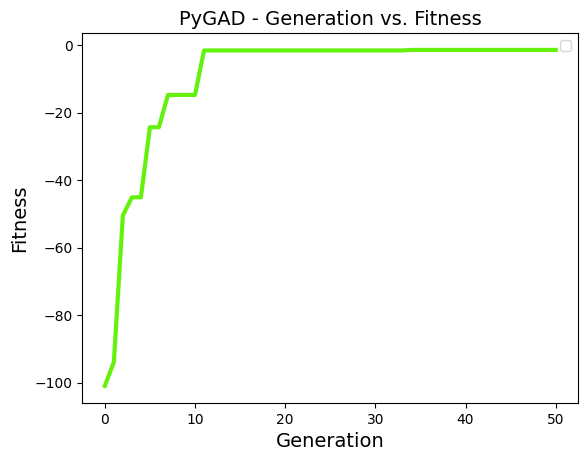

Best Solution: [ 0.36216862 -0.1925282   1.02223633 -0.41528862 -0.03886852]
Fitness of the Best Solution: -1.3871757321149936


In [ ]:
import pygad
import numpy as np

# Define the fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Objective is to minimize the sum of squares
    return -np.sum(np.square(solution))

# Parameters for the genetic algorithm
num_generations = 50
num_parents_mating = 4
sol_per_pop = 10
num_genes = 5
gene_space = {'low': -10, 'high': 10}

# Create an instance of the PyGAD class
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",  # Using tournament selection for better diversity
    keep_parents=1,  # Retain fewer parents to promote diversity
    crossover_type="uniform",  # Use uniform crossover for better genetic diversity
    mutation_type="adaptive",  # Adaptive mutation to balance exploration and exploitation
    mutation_percent_genes=[20, 40]  # Provide a list with 2 values for adaptive mutation
)

# Run the genetic algorithm
ga_instance.run()

# Plot the result
ga_instance.plot_fitness()

# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution:", solution)
print("Fitness of the Best Solution:", solution_fitness)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:774: UserWarning: The percentage of genes to mutate (5) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate ({mutation_percent_genes[idx]}) resulted in selecting ({mutation_num_genes[idx]}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:778: UserWarning: The first element in the 'mutation_percent_genes' parameter is (5) which is smaller than the second element (15).
This means the mutation rate for the high-quality solutions is higher than the mutation rate of the low-quality ones. This causes high disruption in the high qualitiy solutions while making little changes in the low quality solutions.
Please make the fi

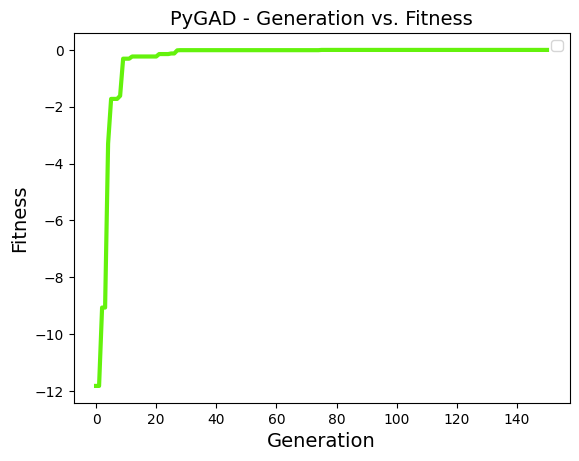

Best Solution: [-0.00598024 -0.0090543  -0.03459727 -0.03292129 -0.03057321]
Fitness of the Best Solution: -0.00333324706201267


In [ ]:
import pygad
import numpy as np

# Define the fitness function
def fitness_function(ga_instance, solution, solution_idx):
    # Objective is to minimize the sum of squares
    return -np.sum(np.square(solution))

# Parameters for the genetic algorithm
num_generations = 150  # Increase number of generations for more optimization
num_parents_mating = 6  # Increase number of parents for better exploration
sol_per_pop = 20  # Increase population size for greater diversity
num_genes = 5
gene_space = {'low': -5, 'high': 5}  # Narrow down gene space to focus more on optimal regions

# Create an instance of the PyGAD class
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",  # Use tournament selection to balance exploration and exploitation
    keep_parents=1,  # Retain fewer parents to promote diversity
    crossover_type="two_points",  # Use two-point crossover for better diversity
    mutation_type="adaptive",  # Adaptive mutation to balance exploration and exploitation
    mutation_percent_genes=[5, 15]  # Reduce mutation percentage to focus search
)

# Run the genetic algorithm
ga_instance.run()

# Plot the result
ga_instance.plot_fitness()

# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution:", solution)
print("Fitness of the Best Solution:", solution_fitness)

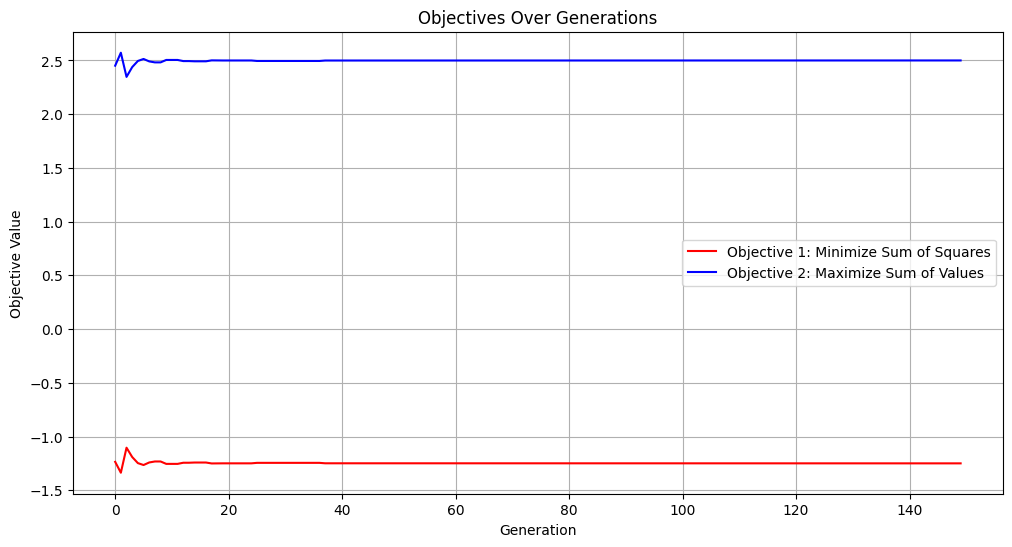

Best Solution: [0.49965527 0.49987381 0.49982668 0.49992517 0.50013799]
Fitness of the Best Solution: 0.6249999052793438


In [ ]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function for multi-objective optimization
def fitness_function(ga_instance, solution, solution_idx):
    # Objectives: Minimize the sum of squares and maximize the sum of the solution values
    objective1 = -np.sum(np.square(solution))  # Minimize sum of squares
    objective2 = np.sum(solution)  # Maximize sum of values

    # Combine objectives (Pareto-based approach could also be used for true multi-objective optimization)
    # For simplicity, we will just return a weighted sum
    weight1 = 0.5
    weight2 = 0.5
    return weight1 * objective1 + weight2 * objective2

# Parameters for the genetic algorithm
num_generations = 150  # Increase number of generations for more optimization
num_parents_mating = 6  # Increase number of parents for better exploration
sol_per_pop = 20  # Increase population size for greater diversity
num_genes = 5
gene_space = {'low': -5, 'high': 5}  # Narrow down gene space to focus more on optimal regions

# Create lists to store objectives across generations
objective1_history = []
objective2_history = []

# Create an instance of the PyGAD class
ga_instance = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    gene_space=gene_space,
    parent_selection_type="tournament",  # Use tournament selection to balance exploration and exploitation
    keep_parents=1,  # Retain fewer parents to promote diversity
    crossover_type="two_points",  # Use two-point crossover for better diversity
    mutation_type="adaptive",  # Adaptive mutation to balance exploration and exploitation
    mutation_percent_genes=[5, 15]  # Reduce mutation percentage to focus search
)

# Run the genetic algorithm and collect objective values across generations
for generation in range(num_generations):
    ga_instance.run()
    best_solution, _, _ = ga_instance.best_solution()
    objective1 = -np.sum(np.square(best_solution))
    objective2 = np.sum(best_solution)
    objective1_history.append(objective1)
    objective2_history.append(objective2)

# Plot the result
fitness_history = ga_instance.best_solutions_fitness
generations = range(len(objective1_history))

plt.figure(figsize=(12, 6))

# Plot objective 1 (minimize sum of squares)
plt.plot(generations, objective1_history, label='Objective 1: Minimize Sum of Squares', color='r')

# Plot objective 2 (maximize sum of values)
plt.plot(generations, objective2_history, label='Objective 2: Maximize Sum of Values', color='b')

plt.xlabel('Generation')
plt.ylabel('Objective Value')
plt.title('Objectives Over Generations')
plt.legend()
plt.grid()
plt.show()

# Run the final generation to get the final solution
# The final run is not necessary as it has already run in the loop.

# Get the best solution
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Best Solution:", solution)
print("Fitness of the Best Solution:", solution_fitness)

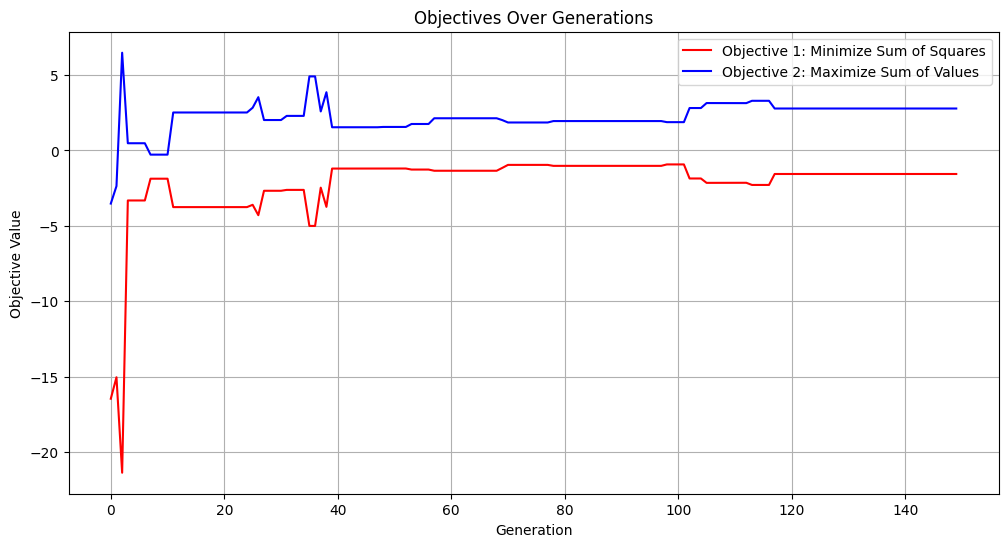

Best Solution: [0.626692   0.6003643  0.55396163 0.5420197  0.45500118]
Fitness of the Best Solution: 0.6085869073867798


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function for multi-objective optimization
def fitness_function(solution):
    # Objectives: Minimize the sum of squares and maximize the sum of the solution values
    objective1 = -torch.sum(solution ** 2)  # Minimize sum of squares
    objective2 = torch.sum(solution)  # Maximize sum of values

    # Combine objectives (Pareto-based approach could also be used for true multi-objective optimization)
    # For simplicity, we will just return a weighted sum
    weight1 = 0.5
    weight2 = 0.5
    return weight1 * objective1 + weight2 * objective2

# Parameters for the genetic algorithm
num_generations = 150  # Increase number of generations for more optimization
population_size = 20  # Increase population size for greater diversity
num_genes = 5
gene_space = {'low': -5, 'high': 5}  # Narrow down gene space to focus more on optimal regions
mutation_rate = 0.1

# Create the initial population
population = torch.empty((population_size, num_genes)).uniform_(gene_space['low'], gene_space['high'])

# Create lists to store objectives across generations
objective1_history = []
objective2_history = []

# Define crossover function
def crossover(parent1, parent2):
    crossover_point = torch.randint(1, num_genes - 1, (1,)).item()
    child1 = torch.cat((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = torch.cat((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# Define mutation function
def mutate(solution):
    if torch.rand(1).item() < mutation_rate:
        mutation_index = torch.randint(0, num_genes, (1,)).item()
        solution[mutation_index] += torch.randn(1).item()
    return solution

# Run the genetic algorithm and collect objective values across generations
for generation in range(num_generations):
    # Calculate fitness of each solution
    fitness_values = torch.tensor([fitness_function(ind) for ind in population])

    # Select the top individuals as parents
    sorted_indices = torch.argsort(fitness_values, descending=True)
    parents = population[sorted_indices[:population_size // 2]]

    # Crossover to create offspring
    offspring = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[i + 1]
        child1, child2 = crossover(parent1, parent2)
        offspring.extend([child1, child2])

    # Mutate offspring
    offspring = [mutate(child) for child in offspring]

    # Create the new population
    population = torch.vstack((parents, torch.stack(offspring)[:population_size - len(parents)]))

    # Record objectives for the best solution
    best_solution = population[0]
    objective1 = -torch.sum(best_solution ** 2).item()
    objective2 = torch.sum(best_solution).item()
    objective1_history.append(objective1)
    objective2_history.append(objective2)

# Plot the result
generations = range(len(objective1_history))

plt.figure(figsize=(12, 6))

# Plot objective 1 (minimize sum of squares)
plt.plot(generations, objective1_history, label='Objective 1: Minimize Sum of Squares', color='r')

# Plot objective 2 (maximize sum of values)
plt.plot(generations, objective2_history, label='Objective 2: Maximize Sum of Values', color='b')

plt.xlabel('Generation')
plt.ylabel('Objective Value')
plt.title('Objectives Over Generations')
plt.legend()
plt.grid()
plt.show()

# Get the best solution
best_solution = population[0]
fitness_of_best_solution = fitness_function(best_solution).item()
print("Best Solution:", best_solution.numpy())
print("Fitness of the Best Solution:", fitness_of_best_solution)

In [ ]:
from pygad.torchga import TorchGA

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from pygad.torchga import TorchGA
import pygad

# Define the neural network model representing the solution
class SimpleModel(nn.Module):
    def __init__(self, num_genes):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(num_genes, 1)

    def forward(self, x):
        return self.fc(x)

# Parameters for the genetic algorithm
num_generations = 150  # Number of generations
population_size = 20  # Population size
num_genes = 5
mutation_rate = 0.1

gene_space = {'low': -5, 'high': 5}  # Gene range for initialization

# Create an instance of the PyTorch model
model = SimpleModel(num_genes)

# Create the initial population using torchga
ga_instance = TorchGA(model=model, num_solutions=population_size)

# Create lists to store objectives across generations
objective1_history = []
objective2_history = []

# Define the fitness function for multi-objective optimization
def fitness_function(ga_instance, solution, solution_idx):
    # Convert solution to a torch tensor
    solution_tensor = torch.tensor(solution, dtype=torch.float32)

    # Objectives: Minimize the sum of squares and maximize the sum of the solution values
    objective1 = -torch.sum(solution_tensor ** 2)  # Minimize sum of squares
    objective2 = torch.sum(solution_tensor)  # Maximize sum of values

    # Combine objectives (Pareto-based approach could also be used for true multi-objective optimization)
    # For simplicity, we will just return a weighted sum
    weight1 = 0.5
    weight2 = 0.5
    return (weight1 * objective1 + weight2 * objective2).item()

# Initialize the genetic algorithm using PyGAD
initial_population = ga_instance.population_weights

ga = pygad.GA(
    num_generations=num_generations,
    num_parents_mating=5,
    initial_population=initial_population,
    fitness_func=fitness_function,
    mutation_percent_genes=10,
    mutation_type='random',
    crossover_type='single_point'
)

# Run the genetic algorithm and collect objective values across generations
ga.run()

# Extract the fitness history
best_solutions = ga.best_solutions_fitness
for solution in ga.best_solutions:
    best_solution_tensor = torch.tensor(solution, dtype=torch.float32)
    objective1 = -torch.sum(best_solution_tensor ** 2).item()
    objective2 = torch.sum(best_solution_tensor).item()
    objective1_history.append(objective1)
    objective2_history.append(objective2)



# Get the best solution
best_solution, best_solution_fitness, _ = ga.best_solution()
fitness_of_best_solution = fitness_function(ga, best_solution, 0)
print("Best Solution:", best_solution)
print("Fitness of the Best Solution:", fitness_of_best_solution)

Best Solution: [0.49662609 0.50732505 0.50423829 0.50754301 0.51474639 0.50092976]
Fitness of the Best Solution: 0.7498208284378052


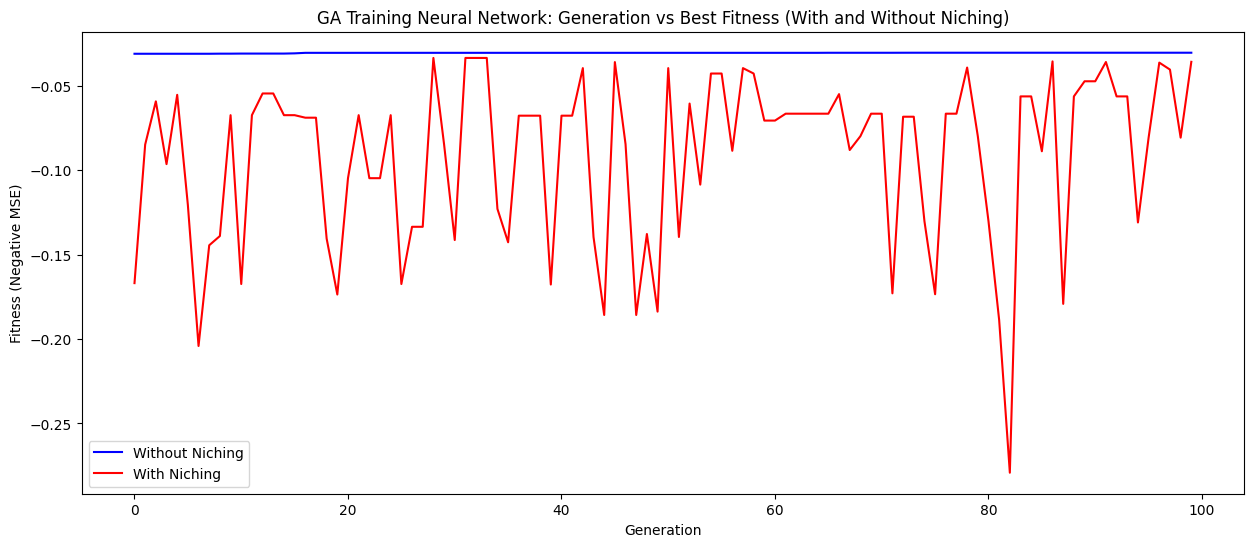

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)

# Genetic Algorithm Parameters
population_size = 20
num_generations = 100
mutation_rate = 0.1

# Initialize population
population = [SimpleNN() for _ in range(population_size)]

# Fitness function: Mean Squared Error on training data
def evaluate_fitness(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X).squeeze()
        loss = torch.mean((predictions - y) ** 2)
    return -loss.item()  # Negative because we want to maximize fitness

# Function for crossover between two parents
def crossover(parent1, parent2):
    child = SimpleNN()
    with torch.no_grad():
        for param_child, param_p1, param_p2 in zip(child.parameters(), parent1.parameters(), parent2.parameters()):
            param_child.data = (param_p1.data + param_p2.data) / 2
    return child

# Function for mutation
def mutate(model, mutation_rate):
    with torch.no_grad():
        for param in model.parameters():
            if np.random.rand() < mutation_rate:
                param.data += torch.randn_like(param) * 0.1

# Run the Genetic Algorithm with and without niching
best_fitnesses_without_niching = []
best_fitnesses_with_niching = []

for use_niching in [False, True]:
    # Initialize population
    population = [SimpleNN() for _ in range(population_size)]
    best_fitnesses = []

    for generation in range(num_generations):
        # Evaluate fitness for each individual in the population
        fitnesses = [evaluate_fitness(individual, X_train_tensor, y_train_tensor) for individual in population]

        # Apply niching: Penalize individuals that are too similar to others
        if use_niching:
            sharing_radius = 0.1
            for i in range(len(population)):
                for j in range(len(population)):
                    if i != j:
                        distance = torch.norm(torch.cat([p.view(-1) for p in population[i].parameters()]) -
                                              torch.cat([p.view(-1) for p in population[j].parameters()]))
                        if distance < sharing_radius:
                            fitnesses[i] -= 0.1  # Penalize fitness if individuals are too similar

        # Select the top 50% individuals
        sorted_indices = np.argsort(fitnesses)[::-1]
        top_individuals = [population[i] for i in sorted_indices[:population_size // 2]]

        # Generate new offspring through crossover
        offspring = []
        for _ in range(population_size - len(top_individuals)):
            parent1, parent2 = np.random.choice(top_individuals, 2, replace=False)
            child = crossover(parent1, parent2)
            mutate(child, mutation_rate)
            offspring.append(child)

        # Form the new population
        population = top_individuals + offspring

        # Record the best fitness
        best_fitnesses.append(max(fitnesses))

    # Store results for plotting
    if use_niching:
        best_fitnesses_with_niching = best_fitnesses
    else:
        best_fitnesses_without_niching = best_fitnesses

# Plotting the best fitness over generations
plt.figure(figsize=(15, 6))

# Plot for training without niching
plt.plot(range(num_generations), best_fitnesses_without_niching, color='blue', label="Without Niching")
# Plot for training with niching
plt.plot(range(num_generations), best_fitnesses_with_niching, color='red', label="With Niching")

plt.xlabel("Generation")
plt.ylabel("Fitness (Negative MSE)")
plt.title("GA Training Neural Network: Generation vs Best Fitness (With and Without Niching)")
plt.legend()
plt.show()


In [ ]:
!pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.4 MB/s eta 0:00:00


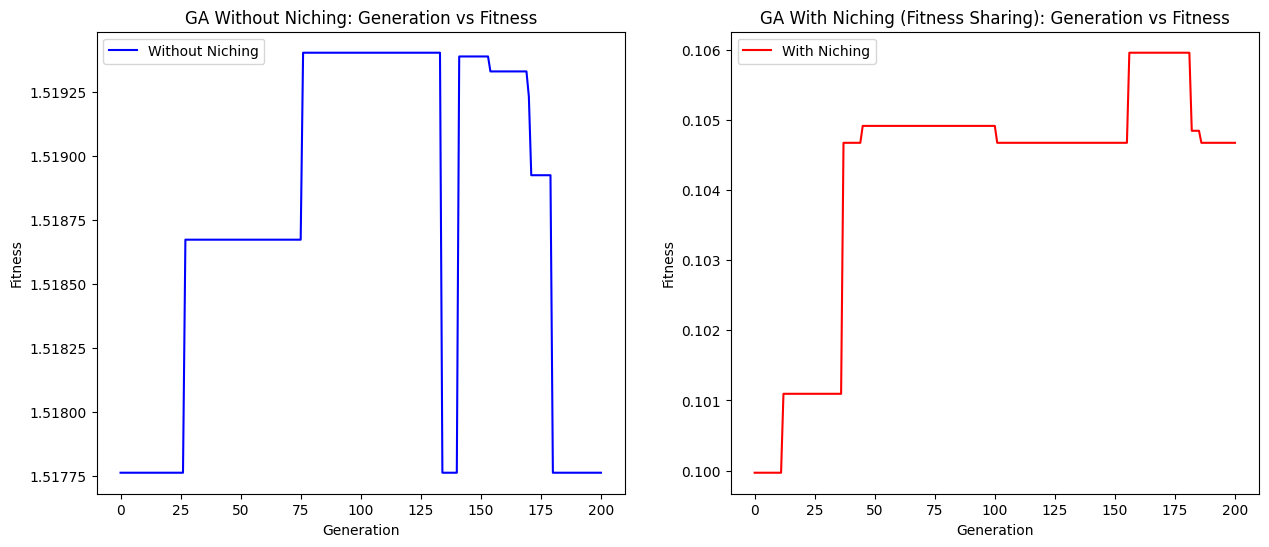

Best Solution Without Niching: [-0.0614603862925156]
Fitness of Best Solution Without Niching: (1.5177614980484635,)
Best Solution With Niching: [0.17221471254824317]
Fitness of Best Solution With Niching: (1.4654314535540411,)


In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the multimodal fitness function
def fitness_function(individual):
    x = individual[0]
    return (
        np.exp(-(x + 2) ** 2) +  # Peak 1
        1.5 * np.exp(-x ** 2) +  # Peak 2
        np.exp(-(x - 3) ** 2),   # Peak 3
    )

# Define a modified fitness function for niching (fitness sharing)
def fitness_function_with_niching(individual, population, sharing_radius=1.5):
    base_fitness = fitness_function(individual)[0]
    niche_count = 0

    for other_individual in population:
        distance = np.linalg.norm(np.array(individual) - np.array(other_individual))
        if distance < sharing_radius:
            niche_count += 1

    shared_fitness = base_fitness / niche_count if niche_count > 0 else base_fitness
    return shared_fitness,

# Register necessary components for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selStochasticUniversalSampling)

def run_ga(fitness_func, num_generations=200, pop_size=50, cxpb=0.7, mutpb=0.2):
    toolbox.register("evaluate", fitness_func)
    population = toolbox.population(n=pop_size)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(
        population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=num_generations,
        stats=stats, verbose=False
    )

    return population, logbook

# Run the GA without niching
population_without_niching, logbook_without_niching = run_ga(fitness_function)

# Run the GA with niching
# Create an initial population for niching
population_with_niching = toolbox.population(n=50)
# Using lambda to pass population as argument to the fitness function
toolbox.register("evaluate", lambda ind: fitness_function_with_niching(ind, population_with_niching))
population_with_niching, logbook_with_niching = run_ga(lambda ind: fitness_function_with_niching(ind, population_with_niching))

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for GA without niching
axes[0].plot(logbook_without_niching.select("max"), color='blue', label="Without Niching")
axes[0].set_title("GA Without Niching: Generation vs Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")
axes[0].legend()

# Plot for GA with niching
axes[1].plot(logbook_with_niching.select("max"), color='red', label="With Niching")
axes[1].set_title("GA With Niching (Fitness Sharing): Generation vs Fitness")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Fitness")
axes[1].legend()

plt.show()

# Get the best solutions for each problem
best_without_niching = tools.selBest(population_without_niching, k=1)[0]
best_with_niching = tools.selBest(population_with_niching, k=1)[0]

print("Best Solution Without Niching:", best_without_niching)
print("Fitness of Best Solution Without Niching:", fitness_function(best_without_niching))

print("Best Solution With Niching:", best_with_niching)
print("Fitness of Best Solution With Niching:", fitness_function(best_with_niching))

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Gen 0: {'avg': -4.725197812914848, 'min': -15.542619705200195, 'max': -0.9515320658683777}
Gen 1: {'avg': -2.1687281727790833, 'min': -6.025190353393555, 'max': -0.9515320658683777}
Gen 2: {'avg': -1.2975044280290604, 'min': -7.490334510803223, 'max': -0.9394561648368835}
Gen 3: {'avg': -0.9472250163555145, 'min': -0.9830997586250305, 'max': -0.9375817179679871}
Gen 4: {'avg': -0.9410181790590286, 'min': -0.9532340168952942, 'max': -0.9371679425239563}
Gen 5: {'avg': -0.9512517064809799, 'min': -1.1883158683776855, 'max': -0.9371679425239563}
Gen 6: {'avg': -0.9376111894845962, 'min': -0.939590334892273, 'max': -0.9371604919433594}
Gen 7: {'avg': -0.9373276084661484, 'min': -0.9384883046150208, 'max': -0.9371598362922668}
Gen 8: {'avg': -0.974402841925621, 'min': -1.5987433195114136, 'max': -0.9371590614318848}
Gen 9: {'avg': -0.9371641606092453, 'min': -0.9371679425239563, 'max': -0.9371589422225952}
Gen 10: {'avg': -1.008010447025299, 'min': -1.767019271850586, 'max': -0.937158942222

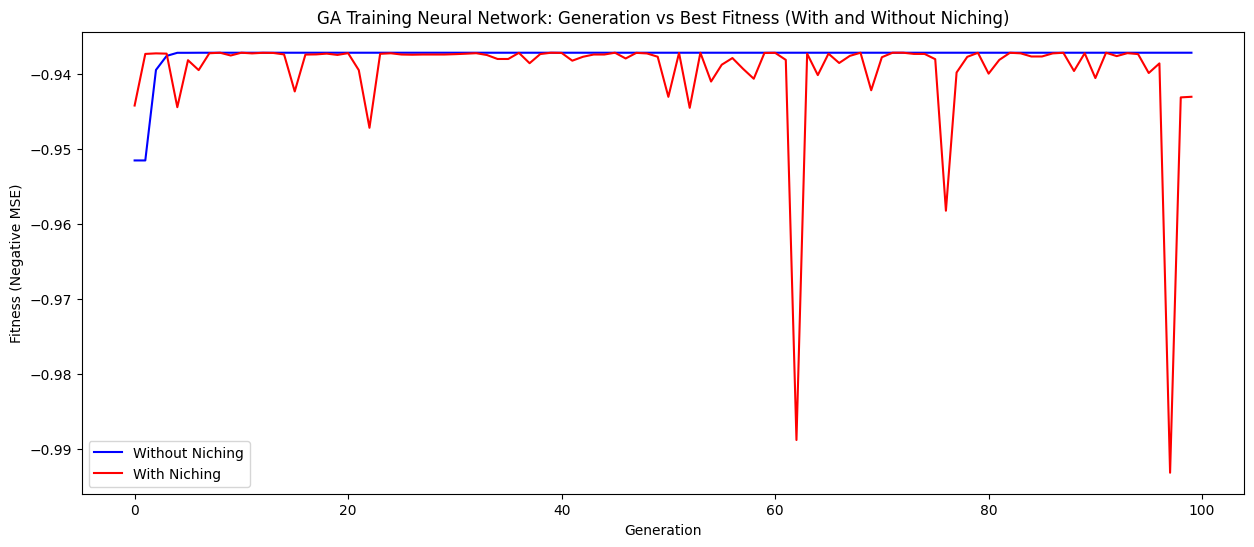

In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Create a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)

# Register necessary components for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate_fitness(individual):
    model = SimpleNN()
    model.fc1.weight.data.fill_(individual[0])
    model.fc1.bias.data.fill_(0)
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    model.eval()
    with torch.no_grad():
        predictions = model(X_train_tensor).squeeze()
        loss = torch.mean((predictions - y_train_tensor) ** 2)
    return -loss.item(),

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_fitness)

def run_ga(num_generations=100, pop_size=20, cxpb=0.7, mutpb=0.2, use_niching=False):
    population = toolbox.population(n=pop_size)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    best_fitnesses = []

    for generation in range(num_generations):
        fitnesses = list(map(toolbox.evaluate, population))
        if use_niching:
            sharing_radius = 0.1
            for i in range(len(population)):
                for j in range(len(population)):
                    if i != j:
                        distance = abs(population[i][0] - population[j][0])
                        if distance < sharing_radius:
                            fitnesses[i] = (fitnesses[i][0] - 0.1,)

        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        population[:] = offspring
        invalid_ind = [ind for ind in population if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        record = stats.compile(population)
        best_fitnesses.append(record['max'])
        print(f"Gen {generation}: {record}")

    return best_fitnesses

# Run the GA without niching
best_fitnesses_without_niching = run_ga(use_niching=False)

# Run the GA with niching
best_fitnesses_with_niching = run_ga(use_niching=True)

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(range(len(best_fitnesses_without_niching)), best_fitnesses_without_niching, color='blue', label="Without Niching")
plt.plot(range(len(best_fitnesses_with_niching)), best_fitnesses_with_niching, color='red', label="With Niching")
plt.xlabel("Generation")
plt.ylabel("Fitness (Negative MSE)")
plt.title("GA Training Neural Network: Generation vs Best Fitness (With and Without Niching)")
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Gen 0: {'avg': -1.700995211005211, 'min': -12.192232131958008, 'max': -0.055574286729097366}
Gen 1: {'avg': -0.215693921148777, 'min': -2.5772082805633545, 'max': -0.05526745319366455}
Gen 2: {'avg': -0.09597989588975907, 'min': -1.7569977045059204, 'max': -0.05525984615087509}
Gen 3: {'avg': -0.16595303997397423, 'min': -4.313783645629883, 'max': -0.05525984242558479}
Gen 4: {'avg': -0.1386250913143158, 'min': -4.214889049530029, 'max': -0.05525980517268181}
Gen 5: {'avg': -0.08447782918810845, 'min': -0.9927099347114563, 'max': -0.05525980517268181}
Gen 6: {'avg': -0.1642326283454895, 'min': -4.493762016296387, 'max': -0.05525980517268181}
Gen 7: {'avg': -0.6069069085270167, 'min': -18.995948791503906, 'max': -0.05525980144739151}
Gen 8: {'avg': -0.2273229668289423, 'min': -8.543000221252441, 'max': -0.05525980144739151}
Gen 9: {'avg': -0.17255473762750625, 'min': -5.376216411590576, 'max': -0.05525980144739151}
Gen 10: {'avg': -0.3469345615804195, 'min': -8.199588775634766, 'max': -

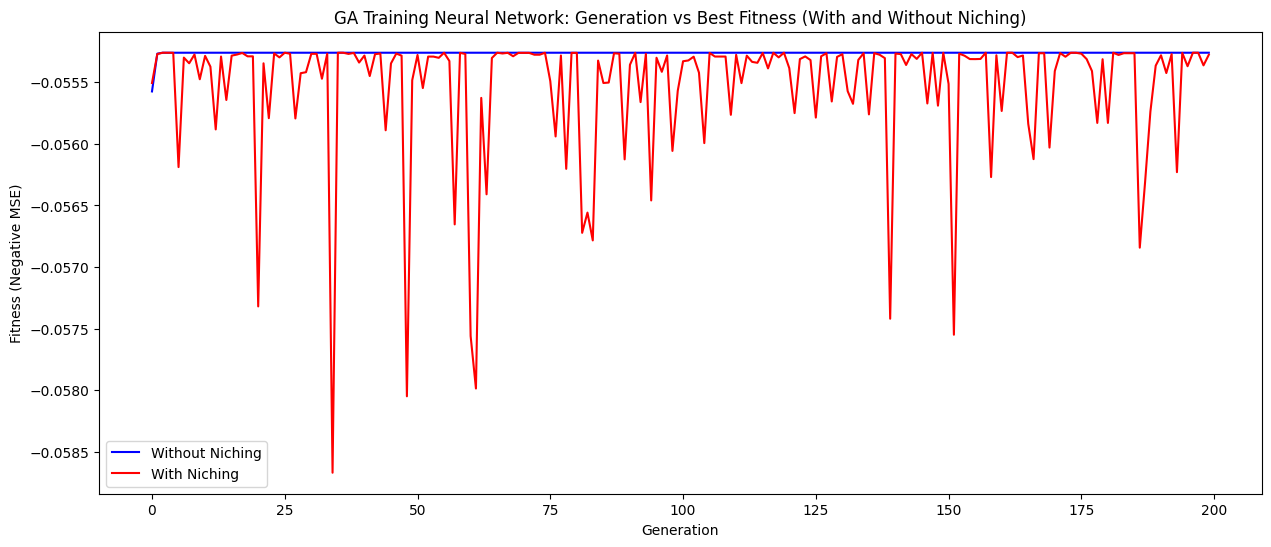

In [ ]:
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Create a synthetic dataset for regression
X, y = make_regression(n_samples=200, n_features=1, noise=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc1(x)

# Register necessary components for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evaluate_fitness(individual):
    model = SimpleNN()
    model.fc1.weight.data.fill_(individual[0])
    model.fc1.bias.data.fill_(0)
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    model.eval()
    with torch.no_grad():
        predictions = model(X_train_tensor).squeeze()
        loss = torch.mean((predictions - y_train_tensor) ** 2)
    return -loss.item(),

# Updated Genetic Algorithm hyperparameters
toolbox.register("mate", tools.cxBlend, alpha=0.7)  # Increase alpha for more exploration during crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1.5, indpb=0.2)  # Increased mutation strength and probability
toolbox.register("select", tools.selTournament, tournsize=5)  # Increase tournament size for stronger selection pressure
toolbox.register("evaluate", evaluate_fitness)

def run_ga(num_generations=200, pop_size=50, cxpb=0.8, mutpb=0.3, use_niching=False):
    population = toolbox.population(n=pop_size)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    best_fitnesses = []

    for generation in range(num_generations):
        fitnesses = list(map(toolbox.evaluate, population))
        if use_niching:
            sharing_radius = 0.05  # Reduced sharing radius to maintain more diversity without excessive penalty
            for i in range(len(population)):
                for j in range(len(population)):
                    if i != j:
                        distance = abs(population[i][0] - population[j][0])
                        if distance < sharing_radius:
                            fitnesses[i] = (fitnesses[i][0] - 0.05,)

        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        population[:] = offspring
        invalid_ind = [ind for ind in population if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        record = stats.compile(population)
        best_fitnesses.append(record['max'])
        print(f"Gen {generation}: {record}")

    return best_fitnesses

# Run the GA without niching
best_fitnesses_without_niching = run_ga(use_niching=False)

# Run the GA with niching
best_fitnesses_with_niching = run_ga(use_niching=True)

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(range(len(best_fitnesses_without_niching)), best_fitnesses_without_niching, color='blue', label="Without Niching")
plt.plot(range(len(best_fitnesses_with_niching)), best_fitnesses_with_niching, color='red', label="With Niching")
plt.xlabel("Generation")
plt.ylabel("Fitness (Negative MSE)")
plt.title("GA Training Neural Network: Generation vs Best Fitness (With and Without Niching)")
plt.legend()
plt.show()